In [1]:
!nvidia-smi

Sat Dec 30 09:53:32 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [31]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/drive/MyDrive/yolov8/runs/detect/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/yolov8/data/test/images/out18.png'

/content
2023-12-30 11:51:08.006965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:51:08.007013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:51:08.008283: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 11:51:09.034875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dri

In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [94]:
model = YOLO('/content/drive/MyDrive/yolov8/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/drive/MyDrive/yolov8/data/test/images/out18.png', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


In [97]:
results[0].boxes.xyxy

tensor([[ 478.,  264., 1026.,  507.],
        [ 681.,  508., 1342.,  887.]], device='cuda:0')

In [71]:
results[0].boxes.conf

tensor([0.92709, 0.63900], device='cuda:0')

In [72]:
results[0].boxes.cls

tensor([0., 0.], device='cuda:0')

In [74]:
boxes = results[0].boxes.cpu().numpy()

In [75]:
boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'numpy.ndarray'>
shape: (2, 6)
dtype: float32
 + array([[        478,         264,        1026,         507,     0.92709,           0],
       [        681,         508,        1342,         887,       0.639,           0]], dtype=float32)

In [101]:
for result in results:
  boxes = result.boxes.cpu().xyxy  # Convert boxes to NumPy array
  for box in boxes:
    x1, y1, x2, y2 = box

In [104]:
cv2.rectangle(image, (int(y1), int(x1)), (int(y2), int(x2)), (0, 255, 0), 2)

array([[[169, 139, 118],
        [169, 139, 118],
        [169, 139, 118],
        ...,
        [ 21, 106,  92],
        [ 21, 106,  92],
        [ 20, 105,  91]],

       [[169, 139, 118],
        [169, 139, 118],
        [169, 139, 118],
        ...,
        [ 21, 106,  92],
        [ 21, 106,  92],
        [ 20, 105,  91]],

       [[169, 140, 116],
        [169, 140, 116],
        [169, 140, 116],
        ...,
        [ 21, 106,  92],
        [ 21, 106,  92],
        [ 20, 105,  91]],

       ...,

       [[156, 140, 119],
        [156, 140, 119],
        [157, 141, 120],
        ...,
        [ 28,  42,  71],
        [ 28,  42,  71],
        [ 28,  42,  71]],

       [[156, 140, 119],
        [156, 140, 119],
        [156, 140, 119],
        ...,
        [ 28,  42,  71],
        [ 28,  42,  71],
        [ 28,  42,  71]],

       [[157, 141, 120],
        [156, 140, 119],
        [156, 140, 119],
        ...,
        [ 28,  42,  71],
        [ 28,  42,  71],
        [ 28,  42,  71]]

In [67]:
print(x1[0])

[[        681         508        1342         887       0.639           0]]


## Custom Training

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [14]:
ls

data/


In [17]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=224 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [18]:
!ls runs/detect/train/

args.yaml					     results.png       train_batch2.jpg
events.out.tfevents.1703934014.ae160fa90b40.16922.0  train_batch0.jpg  weights
results.csv					     train_batch1.jpg


In [19]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

FileNotFoundError: ignored

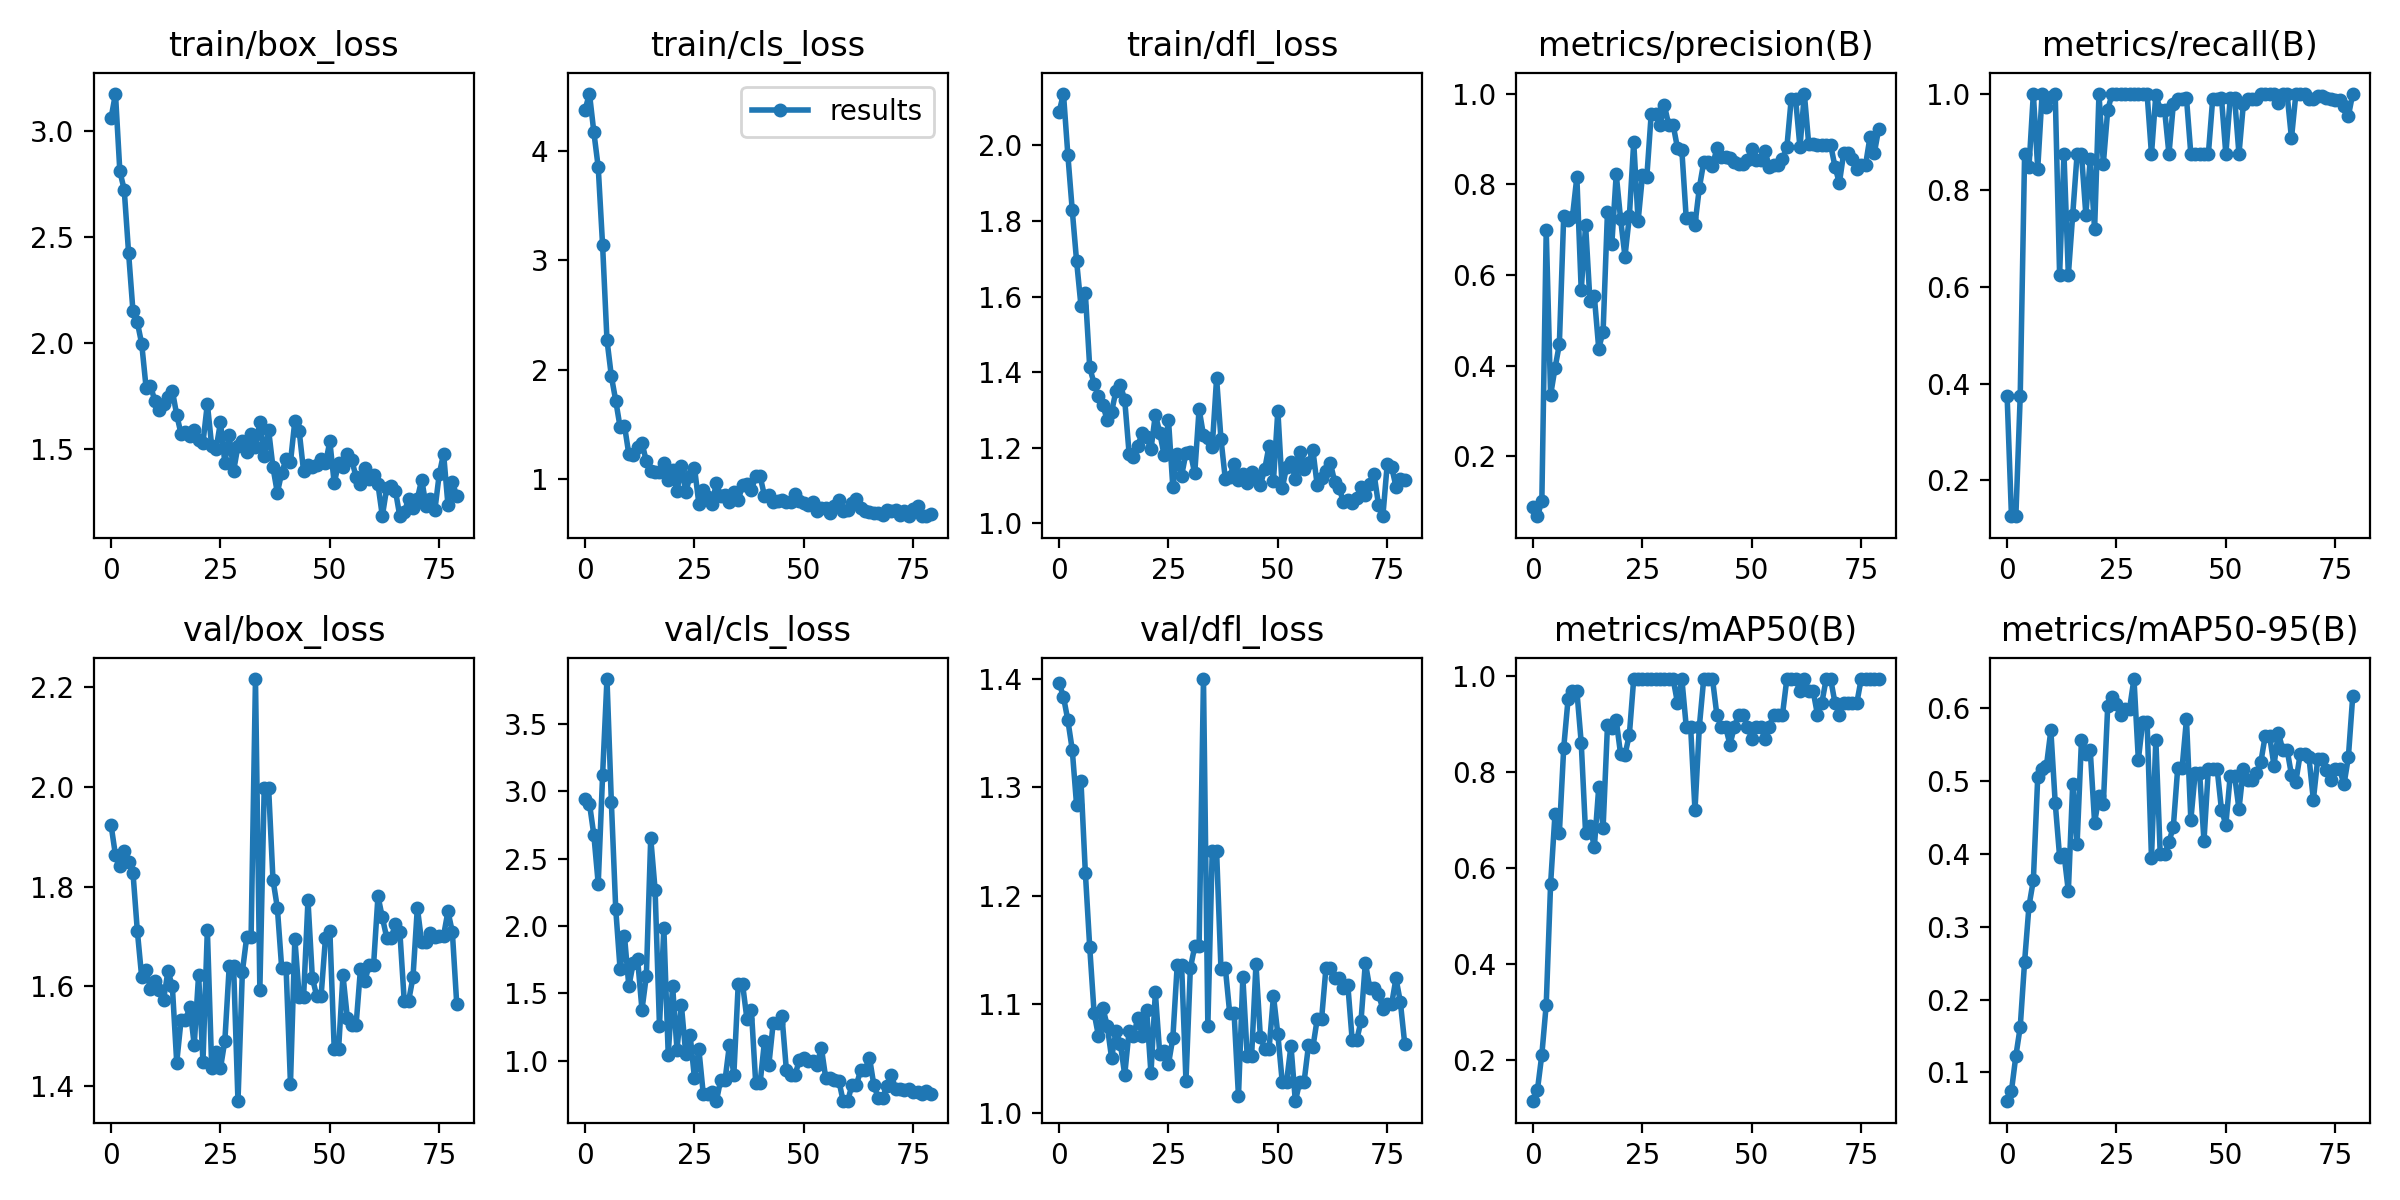

In [20]:
Image(filename='runs/detect/train/results.png', width=600)

In [21]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

FileNotFoundError: ignored

## Validate Custom Model

In [22]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-12-30 11:18:11.340397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:18:11.340460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:18:11.342247: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 11:18:12.874762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/data/valid/labels.cache... 4 

## Inference with Custom Model

In [23]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2023-12-30 11:18:51.374417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:18:51.374478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:18:51.376111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 11:18:52.898880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/4 /content/drive/MyDrive/yolov8/data/test/images/out18 (2).png: 1

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")